In [1]:
import wget
import os.path
import pandas as pd
from netCDF4 import Dataset
import numpy as np
import rasterio
from rasterio.transform import from_origin

In [2]:
import pprint

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
fname = "/Users/Ben/Downloads/SWLs_GPP_TEST/orchidee.dgvm.ipsl.ecearth.SWL4_gpp.nc"
nc = Dataset(fname)   # Connect to the downloaded dataset

In [5]:
pprint.pprint(nc)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    name: stomate_ipcc_history
    description: Created by xios
    title: Created by xios
    Conventions: CF-1.5
    production: An IPSL model
    timeStamp: 2016-Sep-14 23:00:21 CEST
    institution: LSCE
    contact: jinfeng.chang@locean-ipsl.upmc.fr
    history: Wed Nov 23 15:07:52 2016: ncra -d time,0,599 /ccc/store/cont003/dsm/p529chan/IGCM_OUT/OL2/PROD/helix_process/ORC.EC-Earth3-HR.r1i1p1.rcp85/SWL4/orchidee.dgvm.ipsl.ecearth.SWL4_gpp_monthly_20690101_21181231.nc /ccc/store/cont003/dsm/p529chan/IGCM_OUT/OL2/PROD/helix_process/SWLs_GPP_TEST/orchidee.dgvm.ipsl.ecearth.SWL4_gpp.nc
Fri Sep 16 18:21:04 2016: ncatted -a history,global,o,c,Sep.2016 /ccc/store/cont003/dsm/p529chan/IGCM_OUT/OL2/PROD/helix_process/tmp.ipsl.ecearth/orchidee.dgvm.ipsl.ecearth.SWL4_gpp_monthly_20690101_21181231.nc
Sep.2016
    nco_openmp_thread_number: 1
    dimensions(sizes): lat(360), lon(720), time(1)
    varia

In [40]:
assert len(nc['lat'][:]) == 360, 'Lat wrong size'

AssertionError: Lat wrong size

In [38]:
for var in nc.variables:
    if len(nc[var].dimensions) ==3:
        print(nc[var])
        

<class 'netCDF4._netCDF4.Variable'>
float32 gpp(time, lat, lon)
    long_name: Gross Primary Production
    units: kg C m-2 s-1
    online_operation: average
    interval_operation: 1800 s
    interval_write: 1 month
    cell_methods: time: mean (interval: 1800 s) time: mean
    _FillValue: 9.96921e+36
    missing_value: 9.96921e+36
    coordinates: time_centered
unlimited dimensions: time
current shape = (1, 360, 720)
filling on


/Users/Ben/anaconda/lib/python3.5/site-packages/matplotlib/colors.py:853: RuntimeWarning: overflow encountered in true_divide
  resdat /= (vmax - vmin)


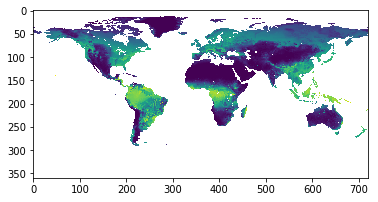

In [43]:
Z = nc.variables['gpp'][0,:,:].squeeze()
plt.imshow(Z)

In [44]:
(np.min(Z))

0.0

In [18]:
#overwrite missing data
missing = Z.data == nc['gpp']._FillValue  # Identify missing values
Z.data[missing] = -99       # Replace them with a smaller, but still distinct value

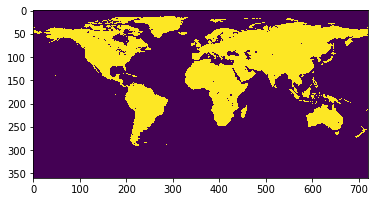

In [19]:
plt.imshow(Z.data)

In [32]:
nc['lat']

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    axis: Y
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
    nav_model: domain_landpoints
unlimited dimensions: 
current shape = (360,)
filling on, default _FillValue of 9.969209968386869e+36 used